In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Kelas LA01

Rio Zakirahman - 2440108566

Rivaldi Desailly Ferdinan - 2440047330

Matthew William - 2440108704

In [2]:
dataset = pd.read_csv('/Users/riozakirahman/Documents/2022/Kuliah Semester-4/Machine Learning/dataset/heart_disease_classification_dataset.csv')
dataset

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,no
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,no
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,no
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,no


In [3]:
dataset.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [5]:
dataset = dataset.drop(labels='Unnamed: 0', axis=1)

fill null value

In [6]:
trestbps_review = dataset['trestbps'].mean()
dataset['trestbps'] = dataset['trestbps'].fillna(trestbps_review)

In [7]:
thalach_review = dataset['thalach'].mean()
dataset['thalach'] = dataset['thalach'].fillna(thalach_review)

encoding target

In [8]:
target_mapping = {'yes' : 1, 'no':0}
dataset["target"] = dataset["target"].map(target_mapping)

encoding sex

In [9]:
sex_mapping = {'male' : 0, 'female':1}
dataset["sex"] = dataset["sex"].map(sex_mapping)

In [10]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,0,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,0,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,1,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,0,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,1,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,1,0,140.000000,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,0,3,110.000000,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,0,0,144.000000,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,0,0,131.712375,131.0,0,1,115.0,1,1.2,1,1,3,0


Value Scaling

In [265]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# dataset_norm = pd.DataFrame(scaler.fit_transform(dataset), columns= dataset.columns)
# dataset_norm

<AxesSubplot:>

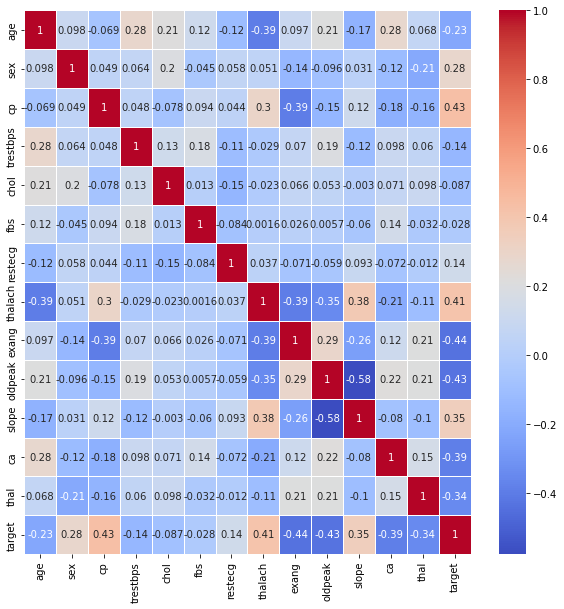

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))       
sns.heatmap(dataset.corr(),cmap='coolwarm', annot=True, linecolor='white', linewidths=.5, ax=ax)

In [12]:
from numpy import cov
covariance = cov(dataset["cp"], dataset["target"])
print(covariance)

[[1.06513234 0.22332962]
 [0.22332962 0.24883614]]


In [13]:
from numpy import cov
covariance = cov(dataset["thalach"], dataset["target"])
print(covariance)

[[5.00690831e+02 4.57244766e+00]
 [4.57244766e+00 2.48836142e-01]]


In [14]:
from numpy import cov
covariance = cov(dataset["slope"], dataset["target"])
print(covariance)

[[0.37973466 0.1063209 ]
 [0.1063209  0.24883614]]


In [15]:
from numpy import cov
covariance = cov(dataset["sex"], dataset["target"])
print(covariance)

[[0.21716609 0.06530719]
 [0.06530719 0.24883614]]


Define X and y

In [16]:
X = dataset[['sex','cp','thalach','slope']].values
y = dataset['target'].values

Split data to train and test

In [17]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) 
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (242, 4) (242,)
Test set: (61, 4) (61,)


Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model

LogisticRegression()

In [19]:
print(model.fit(X_train,y_train))

LogisticRegression()


In [20]:
y_pred = model.predict(X_test)

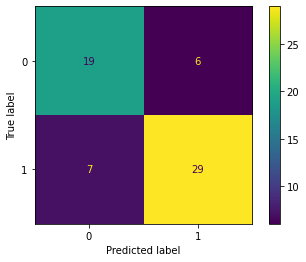

0.7868852459016393

In [21]:
#4) Test accuracy of the result(Creation of Confusion matrix)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
confusion_matrix = confusion_matrix (y_test, y_pred) 
accuracy_score = accuracy_score(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix)
disp.plot()
plt.show()
accuracy_score

In [22]:
#check the score for training dataset and test dataset
print('Train Score: ', model.score(X_train, y_train)) 
print('Test Score: ', model.score(X_test, y_test))

Train Score:  0.7851239669421488
Test Score:  0.7868852459016393


In [23]:
import numpy as np
predict =[[0,1,150,1]]
result = model.predict(predict)
result

array([0])

In [24]:
print('Test Score: ',model.score(predict,result))

Test Score:  1.0


In [25]:
import gradio as gr

def predict(sex,cp,thalach,slope):
    if sex == "female":
        sex = 1;
    if sex == "male":
        sex = 0;
    if cp == "typical angina":
        cp = 0;
    if cp == "atypical angina":
        cp = 1;
    if cp == "non — anginal pain":
        cp = 2;
    if cp == "asymptotic":
        cp = 3;
    if slope == "upsloping":
        slope = 0;
    if slope == "flat":
        slope = 1; 
    if slope == "downsloping":
        slope = 2;
    import numpy as np
    data = [[sex,cp,thalach,slope]]
    result = model.predict(data)
    if result == 0:
          result = "No"
    if result == 1:
          result = "Yes"
    
    return result, confusion_matrix, accuracy_score


choices = ["female", "male"]
cp = ["typical angina", "atypical angina", "non — anginal pain", "asymptotic"]
slope = ["upsloping", "flat", "downsloping"]

app = gr.Interface(fn=predict, 
                    inputs=[gr.Dropdown(choices),gr.Dropdown(cp, label = "Chest Pain"),gr.Number(label = "Thalach - Max heart rate"),gr.Dropdown(slope, label = "Slope of the peak exercise")], 
                    outputs=[gr.Textbox(label = "Heart Disease"), gr.Textbox(label = "Confusion Matrix"),gr.Textbox(label = "Accuracy Score")], 
                    title="Heart Disease Classification")



app.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f8fa9e4d580>, 'http://127.0.0.1:7860/', None)